In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

df_flights = df_cleaned_drop_IQR

### Feature Selection

- Dropped the following columns due to irrelevance or redundancy:
  - `from_airport_code`
  - `dest_airport_code`
  - `airline_number`
  - `flight_number`
  - `currency`
  - `co2_emissions`
  - `avg_co2_emission_for_this_route`
  - `co2_percentage`
  - `scan_date`

In [ ]:
df_flights = df_flights.drop(columns=[
    'from_airport_code',
    'dest_airport_code',
    'airline_number',
    'flight_number',
    'currency',
    'co2_emissions',
    'avg_co2_emission_for_this_route',
    'co2_percentage',
    'scan_date'
])

### Visualization

In [ ]:
# List of categorical columns to plot against price
categorical_cols = [
    'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'
]

# Plotting boxplots for each categorical feature vs. price
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df_flights, x=col, y='price', palette='Set3', meanline=True)
    plt.xticks(rotation=90)
    plt.title(f'Ticket Price Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Ticket Price')
    plt.tight_layout()
    plt.show()


### Feature: `df_cleaned_drop_IF`

- Convert duration from minutes to hours (assuming 'duration' is in minutes)
- Converted `departure_time` and `arrival_time` (e.g., `2022-05-02 16:00:00`, `2022-05-04 06:00:00`) into categorical time slots:
  - `Early_Morning`
  - `Morning`
  - `Afternoon`
  - `Evening`
  - `Night`


In [ ]:
df_flights['duration'] = df_flights['duration'] / 60

In [ ]:
# Define a function to convert hour to time of day
def time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early_Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert strings to datetime if necessary
df_flights['departure_time'] = pd.to_datetime(df_flights['departure_time'])
df_flights['arrival_time'] = pd.to_datetime(df_flights['arrival_time'])

# Apply the function to get time of day categories
df_flights['departure_time_of_day'] = df_flights['departure_time'].dt.hour.apply(time_of_day)
df_flights['arrival_time_of_day'] = df_flights['arrival_time'].dt.hour.apply(time_of_day)

# Drop the original datetime columns if no longer needed
df_flights = df_flights.drop(columns=['departure_time', 'arrival_time'])


In [223]:
df_flights

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Austria,Taiwan,Airbus A330|Boeing 777,[Turkish Airlines],24.833333,1,794.0,Morning,Evening
1,China,Germany,Boeing 777|Airbus A320,[China Eastern| Lufthansa],41.666667,1,1660.0,Early_Morning,Afternoon
2,Belgium,Brazil,Airbus A320|Boeing 747|Boeing 737,[Brussels Airlines| Lufthansa| Gol],26.750000,2,826.0,Evening,Afternoon
3,Brazil,Zurich,Airbus A320|Boeing 777,[LATAM| SWISS],34.333333,1,1339.0,Evening,Morning
4,Austria,Panama,Airbus A320|Boeing 767|Boeing 737,[Austrian| United],22.266667,2,1277.0,Afternoon,Early_Morning
...,...,...,...,...,...,...,...,...,...
99994,Belgium,Panama,Airbus A330|Boeing 737,[Brussels Airlines| COPA],16.483333,1,1364.0,Morning,Evening
99995,Dublin,Columbia,Airbus A320|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.983333,2,1989.0,Morning,Early_Morning
99996,Dublin,Brazil,Airbus A320|Airbus A320|Boeing 777,[Aer Lingus| Iberia| LATAM],20.250000,2,736.0,Afternoon,Early_Morning
99997,Denmark,United States,Boeing 737|Airbus A330|Airbus A321,[KLM| Delta],18.016667,2,1023.0,Morning,Afternoon


In [229]:
airline_split = (
    df_flights['airline_name']
    .str.strip('[]')                      # remove brackets
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

# Step 2: Expand the list into 6 strings (pad with "None" as string)
airline_expanded = airline_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_flights[f'airline_{i+1}'] = airline_expanded.apply(lambda x: x[i])
# df_flights.drop(columns=['airline_name'], inplace=True)

In [230]:
aircraft_split = (
    df_flights['aircraft_type']
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

aircraft_expanded = aircraft_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_flights[f'aircraft_{i+1}'] = aircraft_expanded.apply(lambda x: x[i])
# df_flights.drop(columns=['aircraft_type'], inplace=True)

In [232]:
import category_encoders as ce

# Get object columns
cat_cols = df_flights.select_dtypes(include='object').columns

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_flights[cat_cols], df_flights['price'])

# Merge the encoded values back into the original DataFrame
df_flights = pd.concat([df_flights, df_encoded.add_suffix('_mean_encoded')], axis=1)


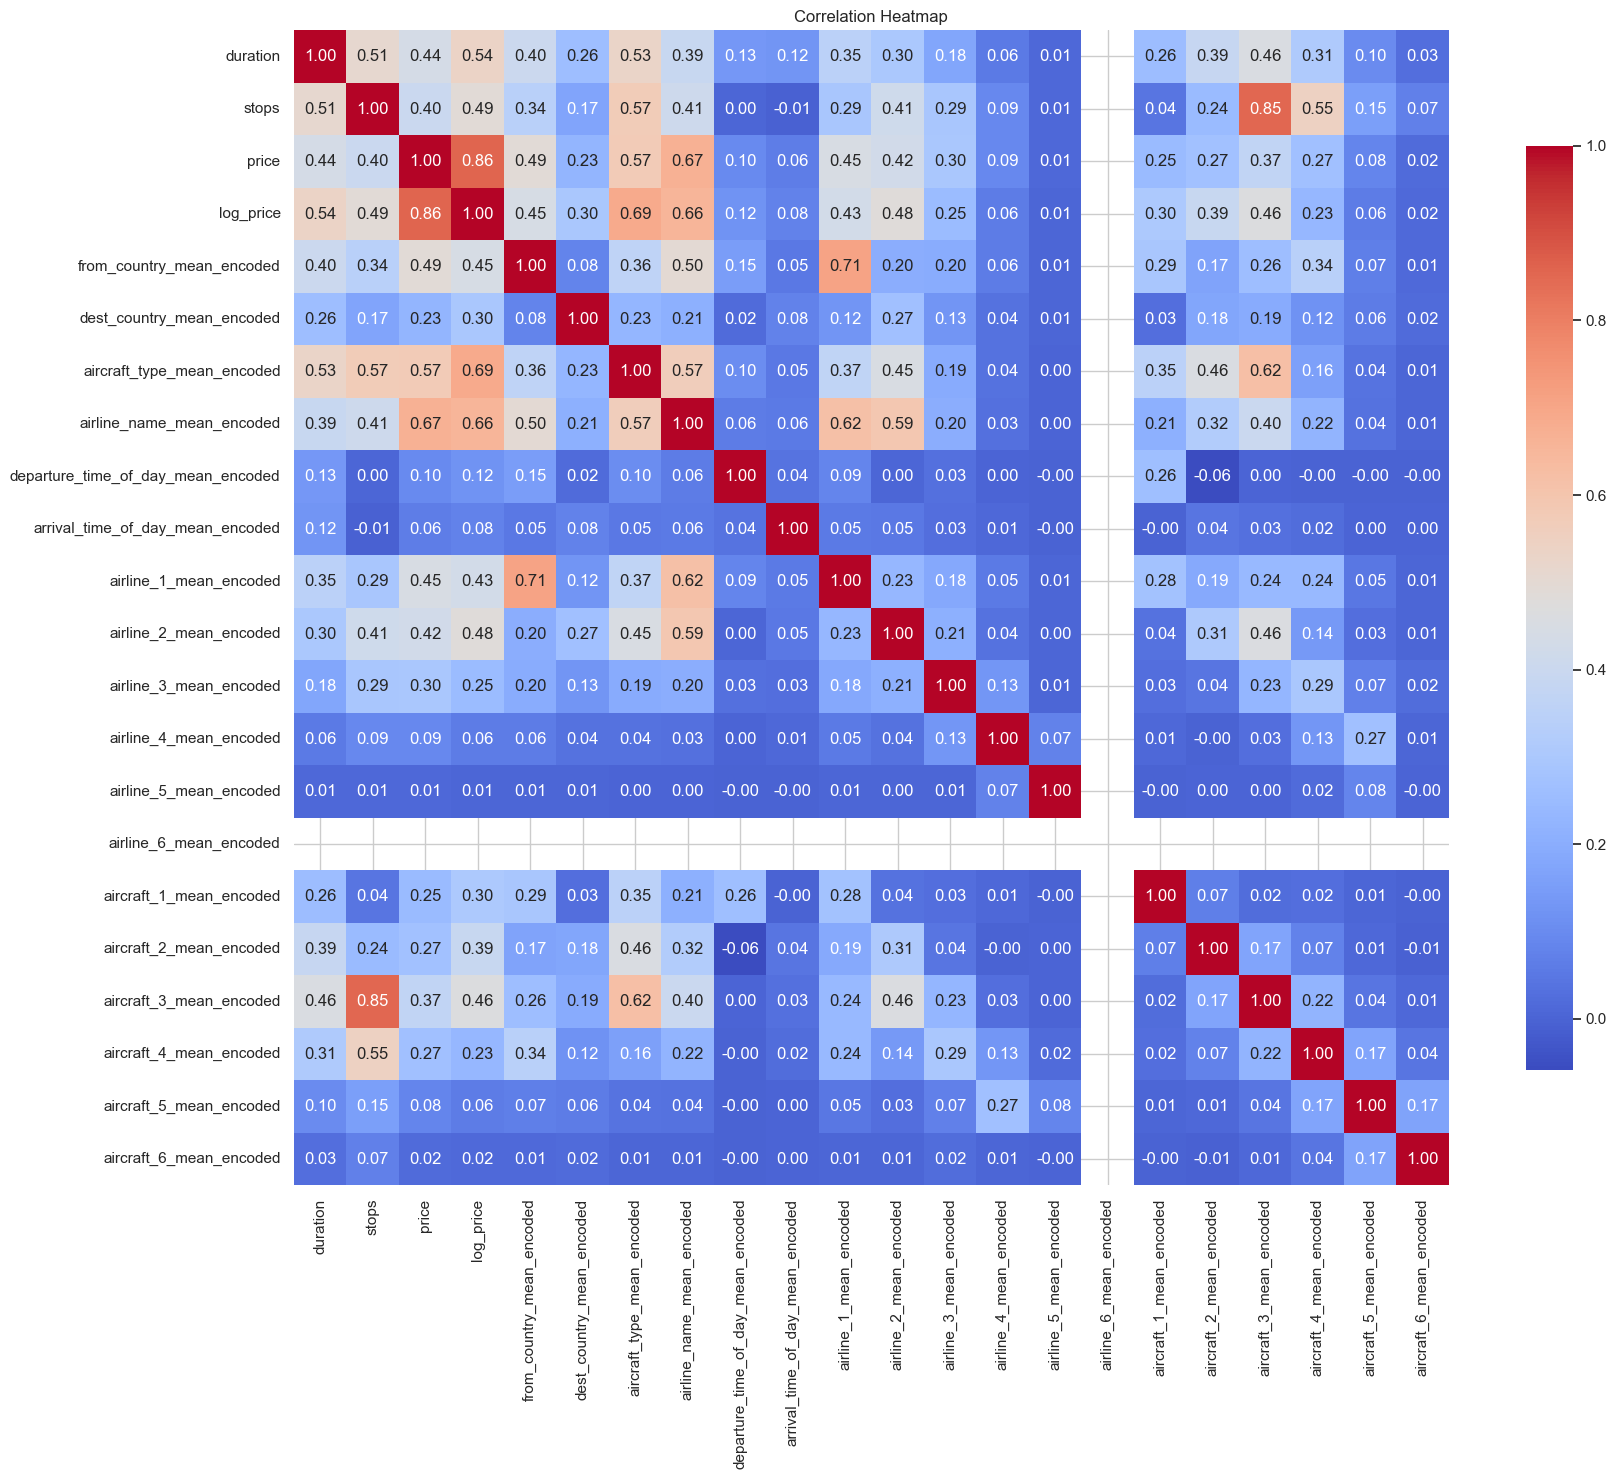

In [ ]:
df1 = df_flights.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### Model Training

In [ ]:
df = df_flights.select_dtypes(include=['number']).copy()  

In [240]:
df

,duration,stops,price,log_price,from_country_mean_encoded,dest_country_mean_encoded,aircraft_type_mean_encoded,airline_name_mean_encoded,departure_time_of_day_mean_encoded,arrival_time_of_day_mean_encoded,...,airline_3_mean_encoded,airline_4_mean_encoded,airline_5_mean_encoded,airline_6_mean_encoded,aircraft_1_mean_encoded,aircraft_2_mean_encoded,aircraft_3_mean_encoded,aircraft_4_mean_encoded,aircraft_5_mean_encoded,aircraft_6_mean_encoded
0,24.833333,1,794.0,6.678342,1107.247528,2214.107914,1185.538462,837.540034,1464.325853,1521.331222,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
1,41.666667,1,1660.0,7.415175,2876.265681,1480.413208,1450.095238,3124.039088,1664.548905,1609.237167,...,1464.036651,1564.600154,1569.798116,1569.835978,1847.591804,1279.599487,984.286603,1478.724712,1564.51728,1569.520075
2,26.750000,2,826.0,6.717805,1072.431730,1349.232911,1419.172402,1456.844228,1586.328076,1609.237167,...,1729.506502,1564.600154,1569.798116,1569.835978,1605.893900,1947.530156,1844.420309,1478.724712,1564.51728,1569.520075
3,34.333333,1,1339.0,7.200425,1937.311808,1335.913153,1450.552480,3258.704179,1586.328076,1675.805666,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
4,22.266667,2,1277.0,7.153052,1107.247528,1443.098963,2141.891076,1419.906250,1538.124601,1471.240017,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,2046.957320,1844.420309,1478.724712,1564.51728,1569.520075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,16.483333,1,1364.0,7.218910,1072.431730,1443.098963,1247.753626,1549.470727,1464.325853,1521.331222,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1380.118773,984.286603,1478.724712,1564.51728,1569.520075
99995,22.983333,2,1989.0,7.595890,884.337779,1611.921424,1601.557574,1455.221498,1464.325853,1471.240017,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1136.540332,2259.065029,1478.724712,1564.51728,1569.520075
99996,20.250000,2,736.0,6.602588,884.337779,1349.232911,2687.085492,1438.087474,1538.124601,1471.240017,...,2324.782377,1564.600154,1569.798116,1569.835978,1605.893900,1279.599487,2322.351308,1478.724712,1564.51728,1569.520075
99997,18.016667,2,1023.0,6.931472,978.078644,1649.839459,1364.745948,1161.281971,1464.325853,1609.237167,...,1464.036651,1564.600154,1569.798116,1569.835978,1538.731554,1609.940547,1843.575743,1478.724712,1564.51728,1569.520075


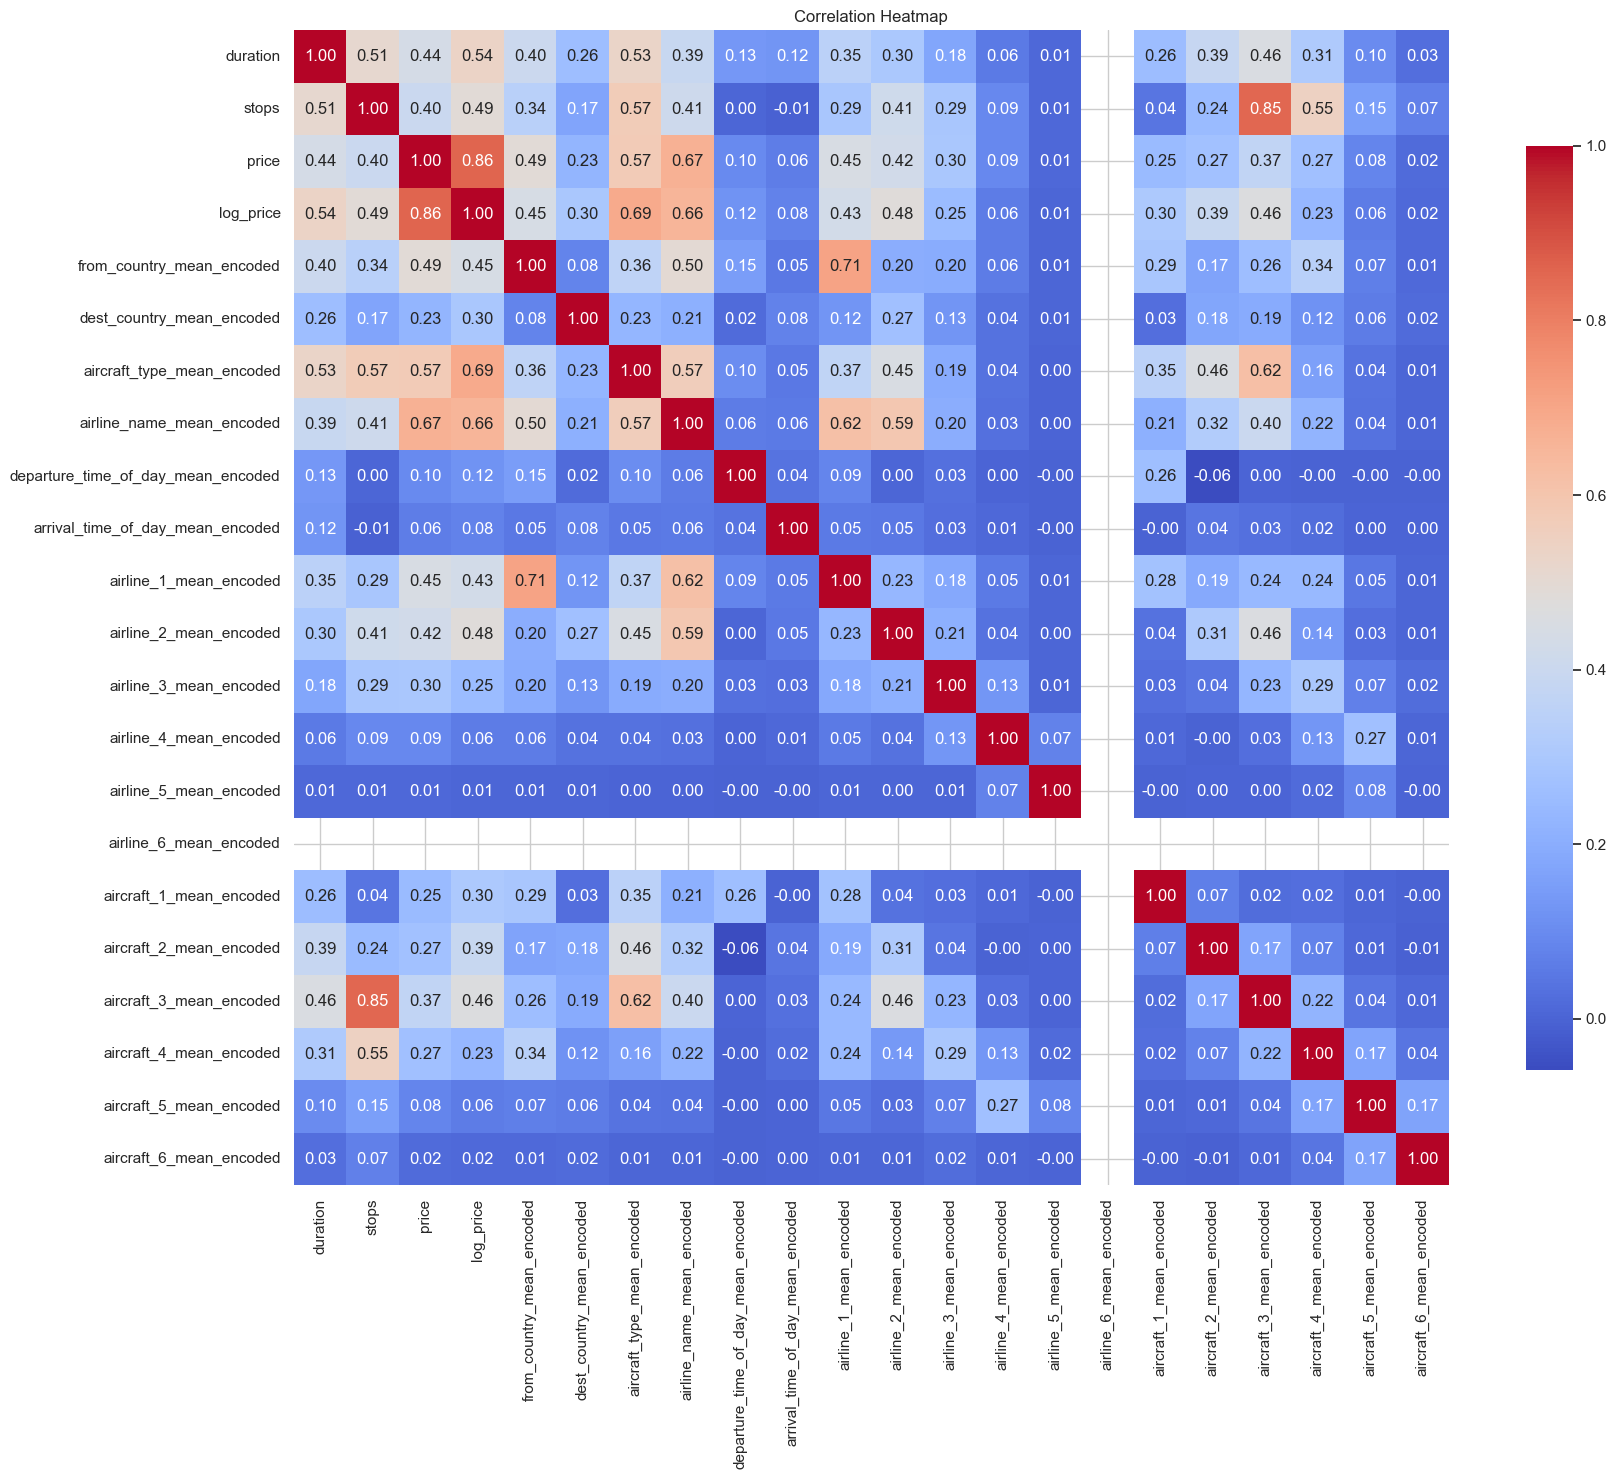

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [242]:
df.columns

Index(['duration', 'stops', 'price', 'log_price', 'from_country_mean_encoded',
       'dest_country_mean_encoded', 'aircraft_type_mean_encoded',
       'airline_name_mean_encoded', 'departure_time_of_day_mean_encoded',
       'arrival_time_of_day_mean_encoded', 'airline_1_mean_encoded',
       'airline_2_mean_encoded', 'airline_3_mean_encoded',
       'airline_4_mean_encoded', 'airline_5_mean_encoded',
       'airline_6_mean_encoded', 'aircraft_1_mean_encoded',
       'aircraft_2_mean_encoded', 'aircraft_3_mean_encoded',
       'aircraft_4_mean_encoded', 'aircraft_5_mean_encoded',
       'aircraft_6_mean_encoded'],
      dtype='object')

In [275]:
# storing the Dependent Variables in X and Independent Variable in Y
# 'departure_time_of_day','arrival_time_of_day'
x=df.drop(columns=['price', 'log_price'])

y=df['price']

#### Train Test Split

In [276]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((69999, 20), (30000, 20), (69999,), (30000,))

In [277]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

# Fit only on x_train and transform both
x_train_scaled = mmscaler.fit_transform(X_train)
x_test_scaled = mmscaler.transform(X_test)

# Convert back to DataFrame and preserve original index
X_train = pd.DataFrame(x_train_scaled, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(x_test_scaled, index=X_test.index, columns=X_test.columns)

In [278]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((69999, 20), (30000, 20), (69999,), (30000,))

#### Trainning

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define models
base_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42)
}

# Evaluate baseline models
baseline_results = {}
baseline_models = {}

for name, model in base_models.items():
    print(f"\nTraining baseline: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mse = mse / (y_range ** 2)

    baseline_results[name] = (r2, mse)
    baseline_models[name] = model

    print(f"{name} - Baseline R²: {r2:.4f}, Baseline MSE: {mse:.4f}, Normalized MSE: {normalized_mse:.4f}")
    print(f"{name} - Baseline RMSE: {np.sqrt(mse):.4f}")



Training baseline: Linear Regression
Linear Regression - Baseline R²: 0.5631, Baseline MSE: 824071.5765, Normalized MSE: 0.0030
Linear Regression - Baseline RMSE: 907.7839

Training baseline: Decision Tree
Decision Tree - Baseline R²: 0.5807, Baseline MSE: 790716.2774, Normalized MSE: 0.0029
Decision Tree - Baseline RMSE: 889.2223

Training baseline: XGBoost
XGBoost - Baseline R²: 0.7489, Baseline MSE: 473589.8216, Normalized MSE: 0.0017
XGBoost - Baseline RMSE: 688.1786

Training baseline: KNN Regressor
KNN Regressor - Baseline R²: 0.6314, Baseline MSE: 695101.4349, Normalized MSE: 0.0025
KNN Regressor - Baseline RMSE: 833.7274

Training baseline: CatBoost
CatBoost - Baseline R²: 0.7437, Baseline MSE: 483395.0722, Normalized MSE: 0.0018
CatBoost - Baseline RMSE: 695.2662

Training baseline: Bagging Regressor
Bagging Regressor - Baseline R²: 0.7512, Baseline MSE: 469236.1818, Normalized MSE: 0.0017
Bagging Regressor - Baseline RMSE: 685.0082


#### Hypertunning

In [270]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids
param_grids = {
    "Linear Regression": {},  # No tunable hyperparameters usually
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.6, 0.8, 1.0]
    },
    "KNN Regressor": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ['uniform', 'distance']
    },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Bagging Regressor": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.75, 1.0],
        "max_features": [0.5, 0.75, 1.0]
    }
}

# Store tuned models and results
best_models = {}
tuned_results = {}

# Tuning loop
for name, model in base_models.items():
    print(f"\nTuning: {name}")
    param_grid = param_grids[name]
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model
        print(f"No parameters to tune for {name}")

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mse = mse / (y_range ** 2)

    best_models[name] = best_model
    tuned_results[name] = (r2, mse)

    print(f"{name} - Tuned R²: {r2:.4f}, Tuned MSE: {mse:.4f}, Normalized MSE: {normalized_mse:.4f}")
    print(f"{name} - Tuned RMSE: {np.sqrt(mse):.4f}")



Tuning: Linear Regression
No parameters to tune for Linear Regression
Linear Regression - Tuned R²: 0.5631, Tuned MSE: 824071.5765, Normalized MSE: 0.0030
Linear Regression - Tuned RMSE: 907.7839

Tuning: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree - Tuned R²: 0.6512, Tuned MSE: 657810.2932, Normalized MSE: 0.0024
Decision Tree - Tuned RMSE: 811.0550

Tuning: XGBoost
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
XGBoost - Tuned R²: 0.7517, Tuned MSE: 468221.7173, Normalized MSE: 0.0017
XGBoost - Tuned RMSE: 684.2673

Tuning: KNN Regressor


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN Regressor: {'weights': 'distance', 'n_neighbors': 7}
KNN Regressor - Tuned R²: 0.7203, Tuned MSE: 527582.2416, Normalized MSE: 0.0019
KNN Regressor - Tuned RMSE: 726.3486

Tuning: CatBoost
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 200, 'depth': 10}
CatBoost - Tuned R²: 0.7402, Tuned MSE: 490058.1538, Normalized MSE: 0.0018
CatBoost - Tuned RMSE: 700.0415

Tuning: Bagging Regressor
Best parameters for Bagging Regressor: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.75}
Bagging Regressor - Tuned R²: 0.7800, Tuned MSE: 414966.0612, Normalized MSE: 0.0015
Bagging Regressor - Tuned RMSE: 644.1786


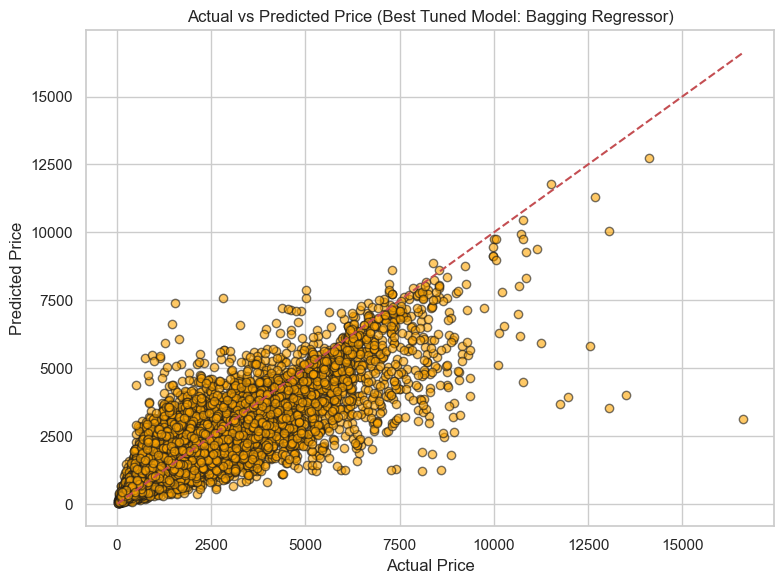

In [271]:
# Plot best model based on tuned R² score
best_model_name = max(tuned_results, key=lambda k: tuned_results[k][0])
y_pred_best = best_models[best_model_name].predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price (Best Tuned Model: {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.show()
